<a href="https://colab.research.google.com/github/jmaximfisenko/basics-of-statistic/blob/main/foundation_of_statistic_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab
import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.formula.api as sf
from google.colab import files

# **Введение**

## Генеральная совокупность

*Генеральная совокупность* - множество всех тех объектов, относительно которых мы хотим сделать выводы в рамках некоторой научной проблемы.

*Выборка* - часть генеральной совокупности, которую мы вибираем и иссследую. Результаты с выборки затем переносятся на генеральную совокупность.

> Выборка должна быть моделью генеральной совокупности, отражать ее свойства, то есть быть *репрезентативной*.

---

**Виды выборки:**

1.   *Простая случайная выборка (simple random sample)*: элементы генеральной совокупности выбираются случайно.
2.   *Стратифицированная выборка (stratified sample)*: сначала совокупность разбивается на несколько разных "страт" (групп) (например, мужчины - в одной, женщины - в другой), затем из каждой группы делается случайная выборка.
3.   *Групповая выборка (claster sample)*: делим совокупность на несколько сильно похожих кластеров (групп) (например, делим СПб на районы), затем берем только несколько кластеров и методом случайной выборки берем элементы для исследования.

> *Страты* - группы по признаку, в то время как *кластеры* - просто случайные группы.

## Типы переменных

Все переменные делятся на 3 группы:


1.   **Количественные** - измеренные значения некоторого признака. 
*   *Непрерывные* - переменная может принимат любое значение на промежутке. *Например*: рост испытуемых.
*   *Дискретные* - принимает только определенные значения. *Например*: число детей в семье.
2.   **Качественные (номинативные)** - используются для разделения испытуемых / исследований на группы. За ними не стоит никакого математического смысла, это просто маркеры (labels). *Например*: женщины обозначаются цифрой 1, мужчины - цифрой 2.
3.   **Ранговые** - значения, которые используются только для сравнения испытуемых / результатов исследований, не показывая разницу. *Например*: место, который по итогу гонки занял каждый велосипедист. Мы можем только сравнить, лучше ли один велосипедист, чем другой, но не можем сказать, насколько он лучше, во сколько раз быстрее приехал и т.д.



## Меры центральной тенденции

**Эмпирические данные** - данные, полученные опытным путем.

**Описательная статистика** - обработка данных, полученных эмпирическим путем, и их систематизация, наглядное представление в форме графиков, таблиц, а также их количественное описание посредством основных статистических показателей.

**Распределение вероятностей** - закон, описывающий область значений случайной величины и вероятность ее появления (частоту) в данной области.

**Гистограмма частот** - ступенчатая функция, показывающая, насколько вероятно появление величины в указанном диапазоне значений.


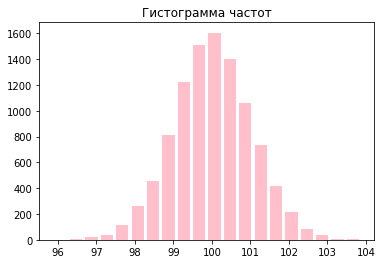

In [ ]:
mean = 100
sigma = 1
x = mean + sigma * np.random.randn(10000)
ax0 = plt.subplot()
ax0.hist(x, 20, histtype='bar', rwidth=0.8, facecolor='pink')
ax0.set_title('Гистограмма частот')
plt.show()


Два типа *описательной статистики*:


1.   *Меры центральной тенденции* - позволяет понять, насколько высокие значения принимают переменные.
2.   *Меры изменчивости* - показывает изменчивость, вариативаность переменных.


---

Меры центральной тенденции:


> **Мода (mode)** - значение измеряемого признака, которое встречается максимально часто.



> **Медиана (median)** - значение признака, которое делит упорядоченное множество данных пополам.


> **Среднее значение (mean)** - сумма всех значений измеренного признака, деленная на количество измерений.


---


**Свойства среднего:**

*   $ M_{x+C} = M_x + C $ - если к каждому значению выборки прибавить какое-либо число, то и среднее увеличится на это число
*   $ M_{x*C} = M_x * C $ - если каждое значение выборки умножить на какое-либо число, то и среднее умножится на это число
*   $ \sum (x_i - M_x) = 0 $ - сумма отклонений от среднего для каждого значения равна нулю










## Меры изменчивости

Существует несколько мер изменчивости:


> **Размах (range)** - разность максимального и минимального значения.

$ R = X_{max} - X_{min} $

> **Дисперсия (variance)** - средний квадрат отклонений индивидуальных значений признака от их средней величины.

Для генеральной совокупности:

$ D = \frac{\sum (x_i - \overline{x}) ^ 2}{n} $

Для выборки:

$ D = \frac{\sum (x_i - \overline{x}) ^ 2}{n - 1} $

> **Среднее квадратичное отклонение (standard deviation)** - корень из дисперсии, показывает  реальное среднее значение отклонений.

$ sd \space (or \space \sigma) = \sqrt D $

В генеральной совокупности - $\sigma$, в выборке - sd.



---

Свойства дисперсии (и стандартного отклонения):

1. $ D_{x+c} = D_{x}, \space sd_{x+c} = sd_{x}$
2. $ D_{x*c} = D_x * c^2, \space sd_{x*c} = sd_x * c $



---

Примеры расчета стандартного отклонения выборки:

In [ ]:
# standart deviation
a = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]
sd = np.std(a, ddof=1)
sd

3.1622776601683795

## Квартили распределения и график box-plot

**Квантили** - такие значения признака, которые делят упорядоченные данные на несколько равных частей.



*   Квантиль (quantile) - 3 равные части
*   Квартиль (quartile) - 4 равные части
*   Квинтиль (quintile) - 5 равных частей
*   Дециль (decile) - 10 равных частей
*   Перцентиль (percentile) - 100 равных частей



> Квартили - 3 точки (значения признака), которые делят упорядоченное множество данных на 4 равные части.

*Межквартильный размах* - разность между 3м и 1м квартилем.

График box plot (ящик с усами):


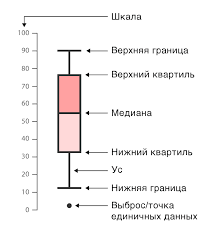

Усы - это значения, которые входят в 1.5 межквартильных размаха от верхнего и нижнего квартиля.

Пример графика box plot:


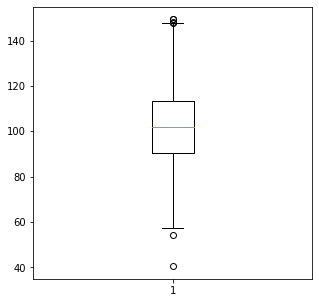

In [ ]:
np.random.seed(10)
data = np.random.normal(100, 20, 200)
fig = plt.figure(figsize=(5, 5))
plt.boxplot(data)
plt.show()

## Нормальное распределение

**Нормальное распределение:**

*   Унимодально
*   Симметрично
*   Отклонения наблюдений от среднего подчиняются определенному вероятностному закону.

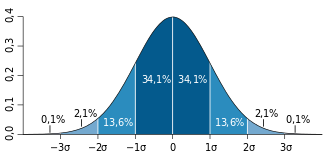

**Z-стандартизация** - преобразование полученных данных в z-шкалу со средним значением равным нулю ($ M_z = 0$) и стандартным отклонением равным единице ($\sigma_z = D_z = 1$).

$ Z_i = \frac{x_i - \overline{x}}{\sigma_x} = (x_i - \overline{x}) * \frac{1}{\sigma_x}$

По свойству дисперсии:

$ D_z = D_x * (\frac{1}{\sigma_x}) ^ 2 = D_x * \frac{1}{D_x} = 1$



---

*Вероятностный закон (правило 2х и 3х "сигм"):*


*   $ M_x \pm \sigma \approx 68 \% $ наблюдений
*   $ M_x \pm 2\sigma \approx 95 \% $ наблюдений
*   $ M_x \pm 3\sigma \approx 99.8 \% $ наблюдений

## Центральная предельная теорема

Если мы сделаем много выборок из генеральной совокупности и далее потроим график распределения для средних значений всех выборок, то итоговое распределение будет нормальным. При этом общее среднее всех средних будет приблизительно равным изначальному среднему значению. Стандартное отклонение в итоговом распределении - **стандартная ошибка среднего**, показывает насколько выборочное среднее отличается от среднего генеральной совокупности.

При увеличении размера выборки распределение выборочных средних будет более "компактным", узким, стандартная ошибка среднего будет меньше.


---


**Центральная предельная теорема:**


> Пусть есть признак, распределенный как угодно, с некоторым средним и стандартным отклонением. Тогда, если выбирать из этой совокупности выборки объемом n, их средние будут тоже распределены нормально со средним равным среднему признака в ГС и стандартным отклонением, определяющимся по формуле: $se = \frac{\sigma}{\sqrt{n}}$, где n - число наблюдений в одной выборке. При этом если число наблюдений в выборке больше 30, можно найти стандартную ошибку среднего по одной выборке: $se = \frac{sd_x}{\sqrt{n}}$





In [ ]:
# Рассчитать стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100
x_sr = 10
D = 4
N = 100
sigma = D ** (1/2)
se = sigma / (N ** (1/2))
se

0.2

## Доверительные интервалы для среднего

In [ ]:
# Рассчитать 99% доверительный интервал для следующего примера:
# x_sr = 10, sd = 5, n = 100

x_sr = 10
sd = 5
n = 100

k = 2.58 # коэффициент для 99% вероятности

se = sd / (n ** 0.5)
border_left = x_sr - k * se
border_right = x_sr + k * se
print(f'[{border_left};{border_right}]')

[8.71;11.29]


Среднее находится с вероятностью в x процентов находится в следующем интервале:
$[\mu-k*se;\mu+k*se]$, где k - коэффициент для доверительного интервала при вероятности x.

## Идея статистического вывода, p-уровень значимости

По формуле:

$ \mu = \overline{x} \pm z \frac{sd}{\sqrt{n}} \Rightarrow \pm z = \frac{\mu - \overline{x}}{se} $

$p$ затем рассчитывается как площадь под кривой по следующей формуле:
$p = \int_{-\infty}^{-z} \frac{1}{\sqrt{2\pi}s^2}exp(-\frac{\overline{x}-\mu}{2s^2})dx + \int_{z}^{+\infty} \frac{1}{\sqrt{2\pi}s^2}exp(-\frac{\overline{x}-\mu}{2s^2})dx = 2\int_{-\infty}^{-z} \frac{1}{\sqrt{2\pi}s^2}exp(-\frac{\overline{x}-\mu}{2s^2})dx$

Уровень достоверности равен $1-p$.



---

*Основная идея статистического вывода:*


*   Сначало допускается, что верна нулевая гипотиза, т.е. никаких различий и взаимосвязей в генеральной совокупности нет.
*   Далее расситывается вероятность того, что можно получить такие или еще более сильные различия абсолютно случайно. Эта вероятность называется **p-уровень значимости**. 
*   При помощи него можно выяснить, какую гипотезу в исследовании можно считать наиболее состоятельной. *Чем меньше уровень значимости, тем больше оснований отклонить нулевую гипотезу.* 

Обычно если $p > 0.05$, считается, что, чтобы отклонить нулевую гипотезу, *оснований недостаточно*.

> **p-уровень значимости** - это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет.

Значение p-уровня, которое выбирается в качестве порога, обозначается как $\alpha$. *Чем меньше $\alpha$, тем меньше шансов отклонить достоверную нулевую гипотезу*.



In [ ]:
# Рассчитать 95% доверительный интервал для среднего значения
M = 20
k = 1.96 # коэффициент для 95% вероятности
n = 64
sd = 4
x_sr = 18.5

se = sd / sqrt(n)

border_left = x_sr - k * se
border_right = x_sr + k * se
print(f'[{border_left};{border_right}]')

[17.52;19.48]


Ошибки бывают 2х родов:


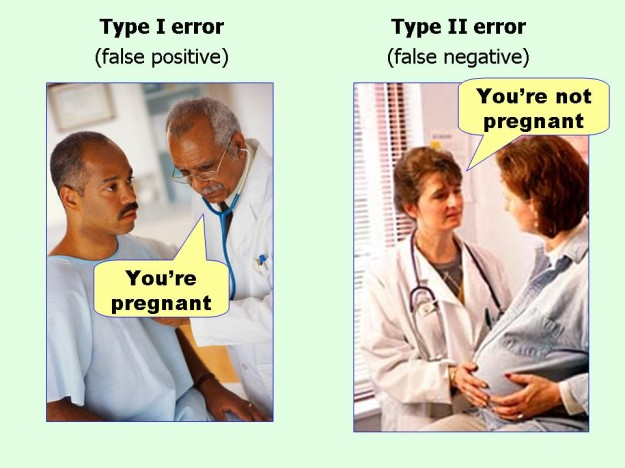

*   **Ошибкой первого рода** называется ошибка, состоящая в опровержении верной гипотезы.
*   **Ошибкой второго рода** называется ошибка, состоящая в принятии ложной гипотезы.


In [ ]:
M = 115
n = 144
x_sr = 118
sd = 9

se = sd / sqrt(n)

z = (M - x_sr) / se
# дальше пользуемся distribution calculator
z

-4.0

# Сравнение средних

## Т-распределение

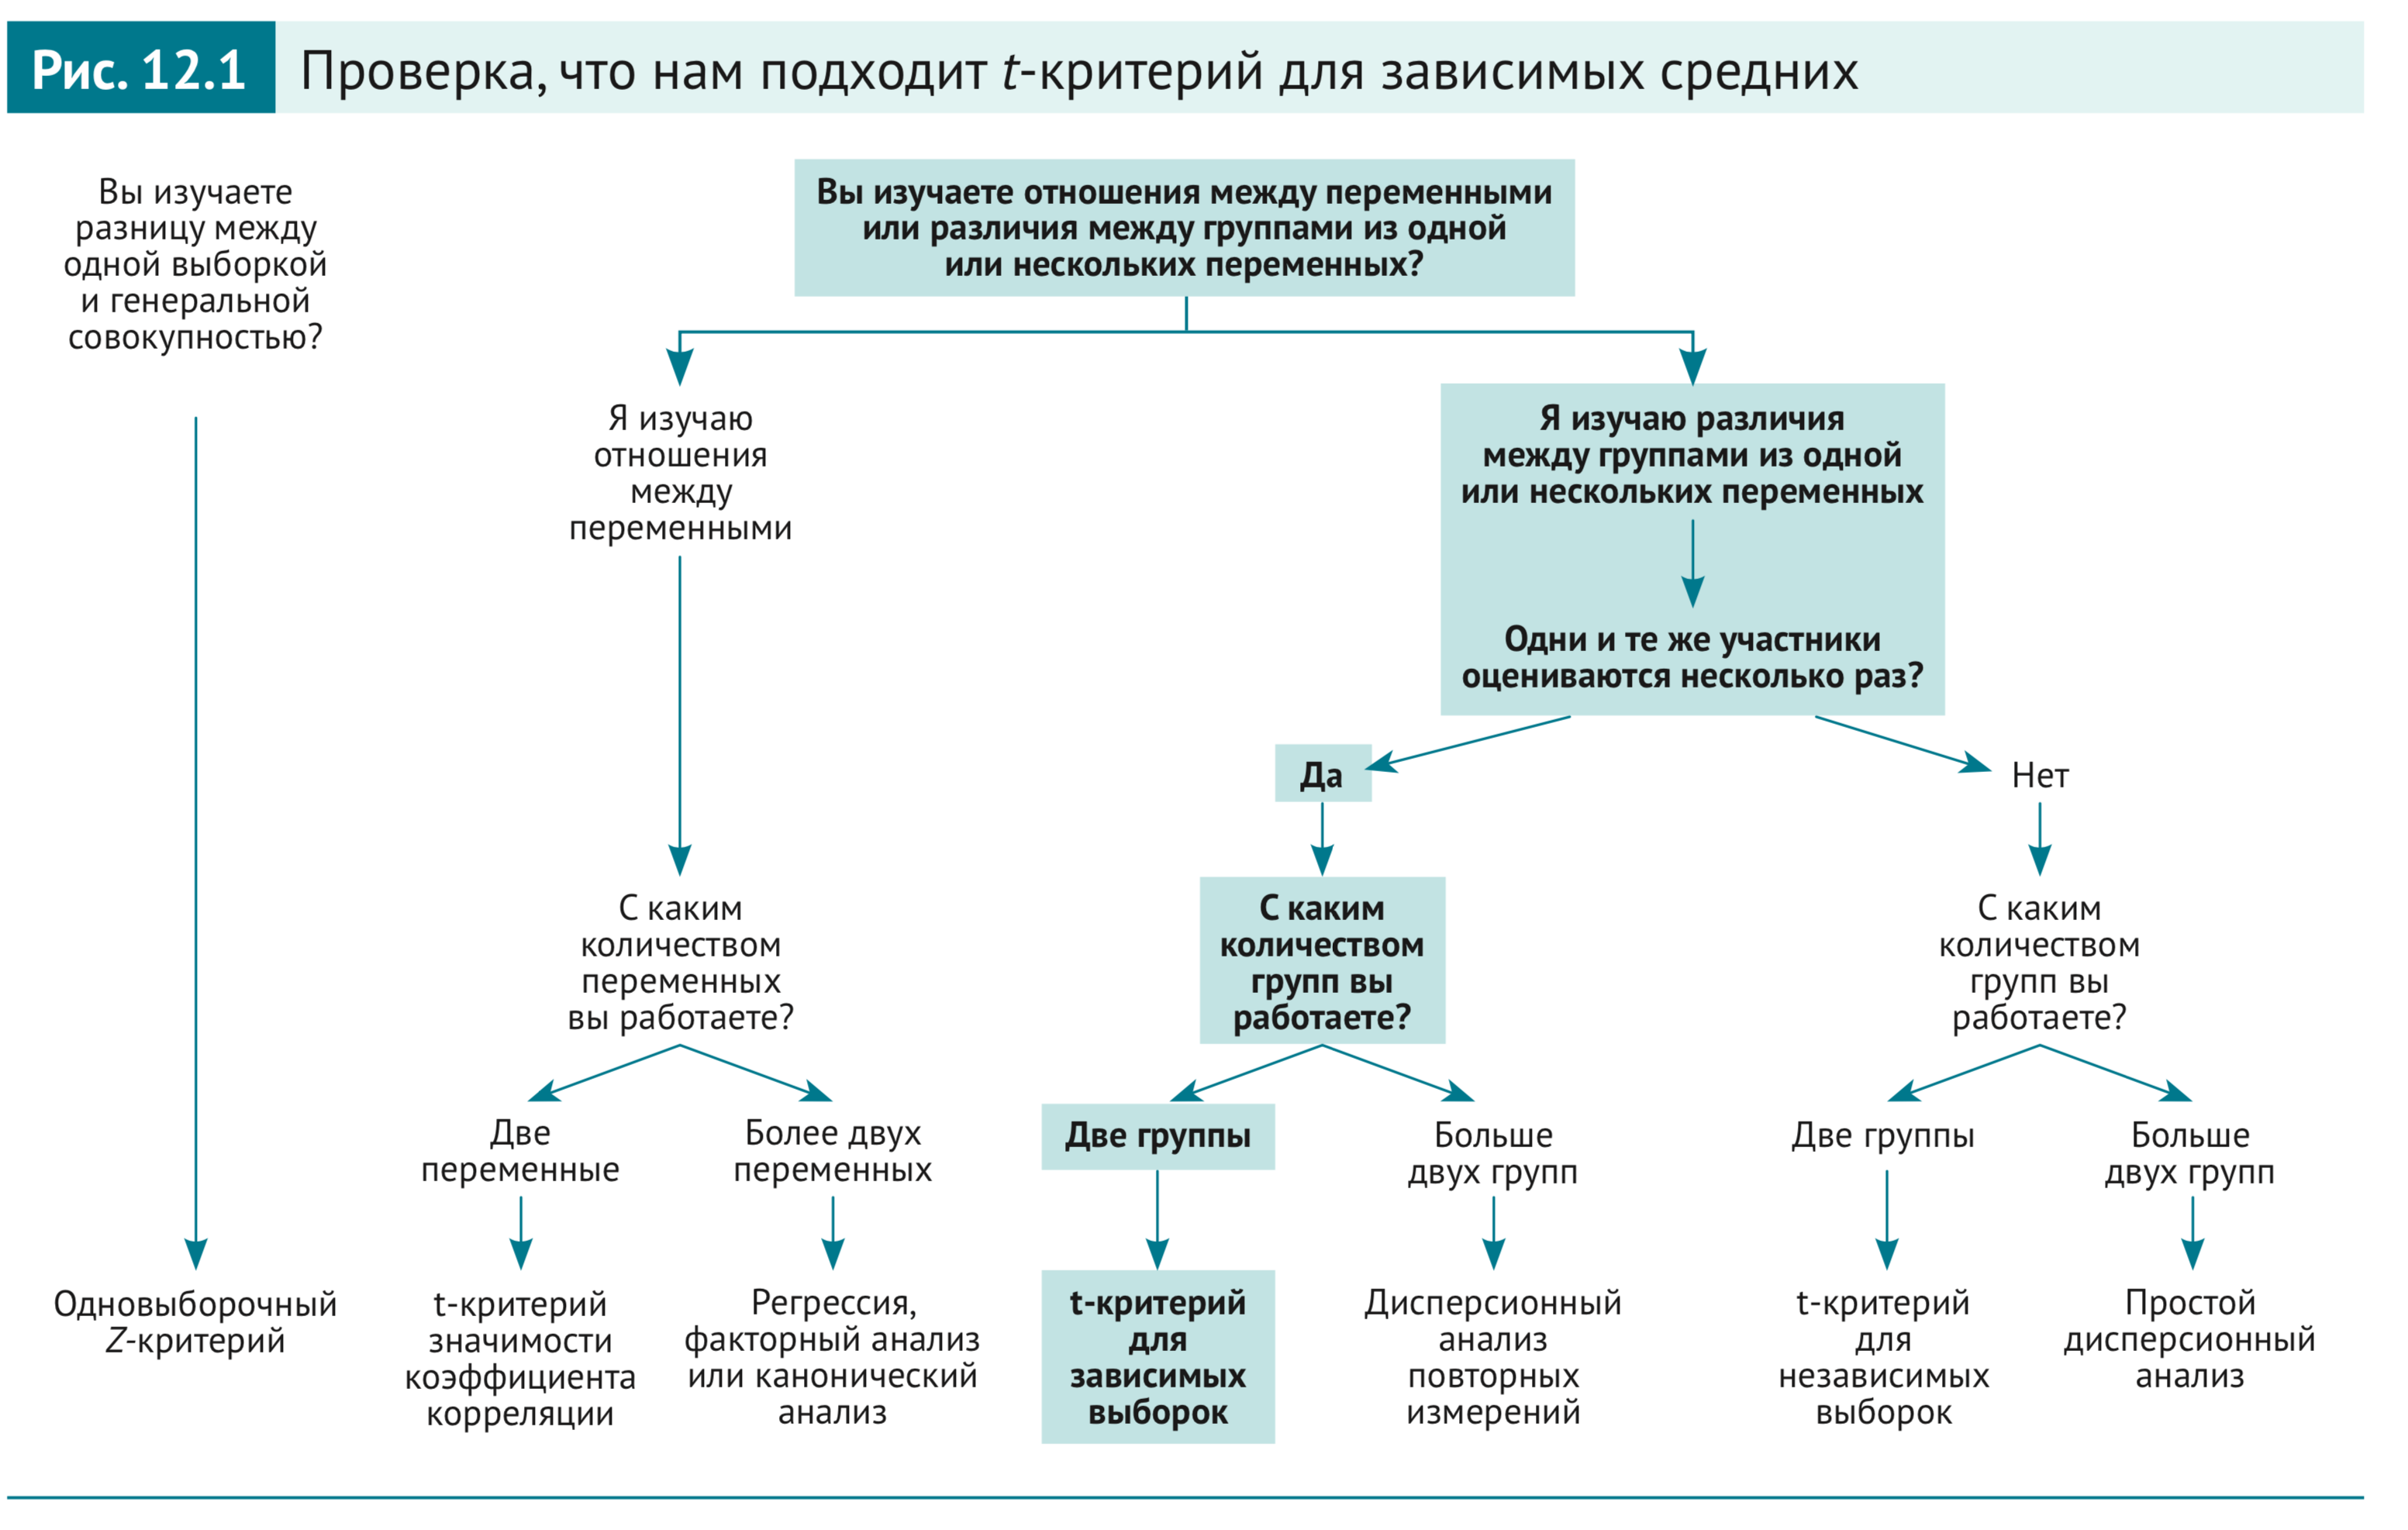

Если число наблюдений невелико и $\sigma$ неизвестно (почти всегда), используется **распределение Стьюдента (t-distribution)**.

Оно, как и нормальное распределение, унимодально и симметрично, но наблюдения с большей вероятностью попадают за пределы $\pm2\sigma$ от $M$.

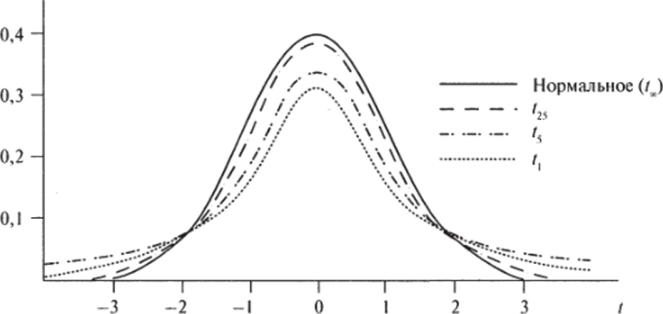

Важный параметр t-распределения - **число степеней свободы** $df$.

*Число степеней свободы* - количество элементов, которые могут варьироваться при расчете некоторого статистического показателя.


> $df = n - 1$, где $n$ - число наблюдений

С увеличением числа $df$ t-распределение стремится к нормальному *(видно на графике выше)*.


---
t-распределение используется для проверки гипотез, когда неизвестно стандартной отклонение всей генеральной совокупности.

Распределене отклонения выборочного среднего описывается по следующей формуле:

$t = \frac{\overline{x} - \mu}{\frac{sd}{\sqrt{n}}}$





## Сравнение двух средных, t-критерий Стьюдента



> **t-критерий Стьюдента (независимый t-тест)** - критерий, который позволяет сравнивать два выборочных средних между собой.

Допустим, у нас есть гипотезы:

$ H_0 : \mu_1 = \mu_2$

$ H_1 : \mu_1 \neq \mu_2$

Тогда:

> $ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $

> $ df = n_1 + n_2 - 2 $

> $ t = \frac{\overline{x_1} - \overline{x_2}}{se} = \frac{\overline{x_1} - \overline{x_2}}{\sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}}$

$t$ - это кол-во "сигм". Дальше по нему считаем p-значение.

Когда можно применять t-критерий Стьюдента:

*   Желательно, чтоб дисперсии внутри групп были примерно одинаковы (требование гомогенности дисперсии). Гомогенность дисперсии можно оценить, используя *критерий Левена* или *критерий Фишера*.
*   Если объем выборки небольшой ($< 30$), распределение признаков должно быть нормальным.







In [ ]:
# Рассчитать доверительный интервал, основываясь на знании t - распределения для среднего значения

# начальные данные
x_sr = 89.9
sd = 11.3
n = 20

# коэффициент считаем оп таблице критических значений для t-распределения
k = 2.093

# далее по формуле: x_sr +- k * sd_x / sqrt(n)

temp = k * sd / sqrt(n)
print(f'[{round(x_sr - temp, 2)};{round(x_sr + temp, 2)}]')



[84.61;95.19]


In [ ]:
# решить, отклонять ли нулевую гипотезу

x1 = 45
sd1 = 9
n1 = 100
x2 = 34
sd2 = 10
n2 = 100


t = (x1 - x2) / sqrt((sd1 ** 2) / n1 + (sd2 ** 2) / n2)
t

# далее находим p, оно очень мало, отклоняем нулевую гипотезу

8.176235608718828

## Проверка распределения на нормальность, QQ-Plot

Чтобы проверить наше распределение на нормальность, можно построить *гистограмму частот* нашего распределения и поверх нее наложить *кривую идеального нормального распределения*.

Пример:

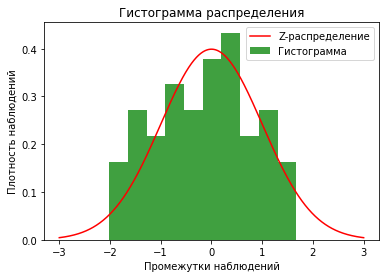

In [ ]:
mean = 0 # мат. ожидание (среднее)
sd = 1 # стандартное отклонение
N = 50 # кол-во наблюдений

sample = np.random.normal(loc=mean, scale=sd, size=N)  # Генерация нормального 
# распределения с мат.ожиданием, стандартным отклонением и количеством элементов в выборке

n, bins, patches = plt.hist(sample, 10, density=True, facecolor='green', alpha=0.75, label='Гистограмма')
plt.title('Гистограмма распределения')
plt.xlabel('Промежутки наблюдений')
plt.ylabel('Плотность наблюдений')

# Построим поверх гистограммы график Z-распределения
x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')  # Строим график Z-распределения

plt.legend()
plt.show()

Еще один способ проверки распределения на нормальность: **график Quantile-Quantile Plot (QQ Plot)**.

Он показывает, насколько наши выборочные значения соотвествуют теоретическим значениям, т.е. значениям, которые были бы, если распределение было бы нормальным.

Удобен тогда, когда у нас мало наблюдений.

Пример:

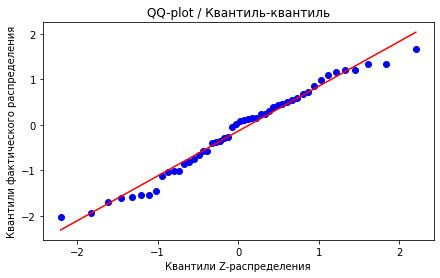

In [ ]:
plt.figure(figsize = [7, 4])  # Создаем фигуру qq_plot
norm = stats.probplot(sample, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции 
# по поиску квантелей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль')
plt.xlabel('Квантили Z-распределения')
plt.ylabel('Квантили фактического распределения')

plt.show()

Для проверки на нормальность также используются еще два теста:


*   тест Колмогорова-Смирнова
*   тест Шапиро-Уилка

Они позволяют проверить гипотезу о том, что наша выборка изъята из ГС, где распределение признака соответствует ноормальному.

Тут если $ p > 0.05 $, то нулевую гипотезу не отклоняем, следовательно распределение нормальное.





In [ ]:
sample

array([ 0.1331375 ,  1.20274387, -1.02475297,  0.16039916, -1.13047529,
       -1.94129968,  0.98659782,  0.02822737, -0.8223676 , -1.58655176,
       -0.40147282,  1.34217928,  0.40246909, -0.37276142, -0.67202344,
        0.10581208, -1.54730539,  1.34480651,  0.50318918,  1.1943506 ,
       -0.56350567,  0.85482876,  0.68790473, -1.53306872,  0.1489607 ,
        0.31511117, -0.57491766, -0.36017113,  0.4361853 , -0.03791788,
       -1.00471635,  0.59145309,  0.22781736,  0.24917866,  0.09576324,
        0.44902173, -0.28600201, -0.8627583 , -0.74182484,  1.10557514,
       -2.01771865,  0.54054071, -1.44229888, -1.60885036, -1.00656856,
       -0.25753362,  0.73050745, -1.69840149,  1.67407555,  1.1637237 ])

In [ ]:
shapiro_test = stats.shapiro(sample)
p_value_1 = shapiro_test[1]
ks_test = stats.kstest(sample, 'norm')
p_value_2 = ks_test[1]
p_value_1, p_value_2

(0.24877947568893433, 0.8592043355216139)

При наличии даже небольшого количества выбросов t-критерий не будет работать верно. Нужна альтернатива.

> Если присутствуют выбросы, то можно применить непараметрический аналог t-критерия Стьюдента - **Mann-Whitney U-test**. В отличие от t-критерия, он более устойчив к выбросам.

**Непараметрический метод** - метод, использование которого не подразумевает работу с параметрами выборки (среднее, стандартное отклонение и т.д.)



---



Принцип работы **Mann-Whitney U-test**:

Допустим, у нас есть выборки $A$ и $B$:

Treatment A:

3

4

2

6

2

5

Treatment B:

9

7

5

10

6

8

$H_0$ - разницы между рангами выборок нет, $H_1$ - разница есть, они разные.

* Запишем все значения по порядку (по рангам):

*1) 2*

*2) 2*

3) 3

4) 4

*5) 5*

*6) 5*

*7) 6*

*8) 6*

9) 7

10) 8

11) 10

12) 11

* У *повторяющихся значений* меняем ранги, берем среднее арифметическое:

**1.5)** *2*

**1.5)** *2*

3) 3

4) 4

**5.5)** *5*

**5.5)** *5*

**7.5)** *6*

**7.5)** *6*

9) 7

10) 8

11) 10

12) 11

* Посчитаем сумму рангов для каждой выборки:

$\sum_A = 23.0$

$\sum_B = 55.0$

* Для каждой выборки посчитаем коэффициент $U$ по формуле:

> $U_{STAT} = \sum_{RANK} + \frac{n(n - 1)}{2}$, где $n$ - число наблюжений в выборке.

Получаем:

$U_A = 2.0$

$U_B = 23.0$

* Берем за коэффициент $U$ наименьшее из полученных значений:

$U_{STAT} = 2.0$

* Находим критическое значение коэффициент по таблице критических значений:

$U_{CRIT} = 5.0$





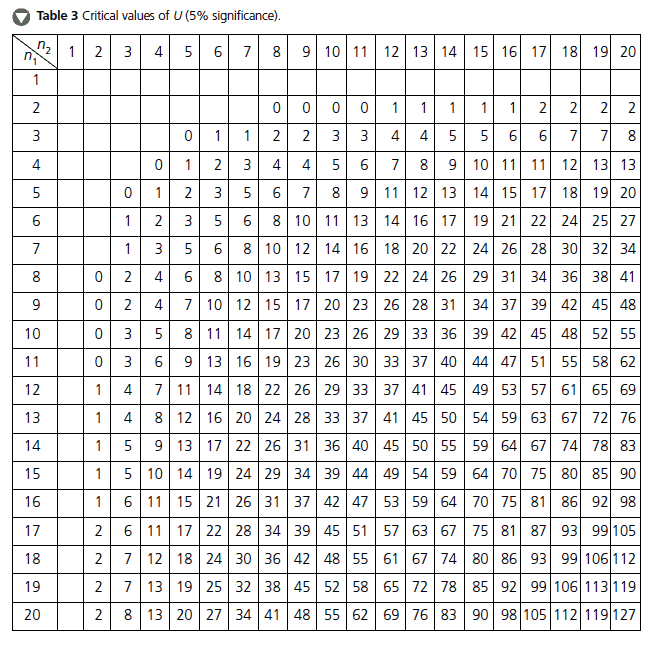

* Если $U_{STAT} < U_{CRIT}$, то значит, что вряд ли такой разброс мог произойти случайно, и мы можем отбросить нулевую теорию.

## Однофакторный дисперсионный анализ (ANOVA)

**ANOVA** - *ANalysis Of VAriance* - дисперсионный анализ.

**Независимая переменная** - переменная, которая разделяет испытуемых / наблюдения на группы (номинативная переменная с нескольким градациями).

**Зависимая переменная** - количественная переменная, по степени выраженности которой мы сравниваем группы.


---

Пример:

Пусть есть 3 группы чисел:

**1)** 3 1 2

**2)** 5 3 4

**3)** 7 6 5

Гипотезы:

$H_0: \mu_1 = \mu_2 = \mu_3$

$H_1: \space!(\mu_1 = \mu_2 = \mu_3)$

$ $

$n$ - общее число значений

$p$ - число групп

---

0) Представим все числа как одну группу (всего $N$ чисел):

$3\space1\space2\space5\space3\space4\space7\space6\space5$


1) Считаем *среднее всех наблюдений*:

> $\overline{x} = \frac{\sum_{i=1}^{n}x_i}{n}$

$\overline{x} = \frac{3 + 1 + 2 + 5 + 3 + 4 + 7 + 6 + 5}{9} = 4$

2) **SST (sum of squares total)** - общая сумма квадратов, показатель, который характеризует, насколько высока изменчивость данных (без учета разделения их на группы).

> $SST = \sum_{j=1}^p\sum_{i=1}^{n_j}(x_{ij} - \overline{x})^2$, где $p$ - число групп, $n_j$ - число значений в группе

$SST = (3 - 4)^2 + (1 - 4)^2 + (2 - 4)^2 + (5-4)^2 + (3-4)^2 + (4-4)^2 + (7-4)^2 + (6-4)^2 + (5-4)^2 = 30$

3) Считаем *число степеней свободы*:

> $df = n - 1$

$df = 9 - 1 = 8$

Пояснение: количество независимых переменных. В данном случае: зная $SST$ и 8 чисел (и еще среднее), можно высчитать последнее. Но если мы будет знать только 7 чисел, то найти оставшиеся 2 будет уже невозможно.

$SST$ = $SSB$ (between-subject sum) + $SSW$ (within-subject sum)

> То есть $SST$ получается на основе двух факторов: насколько высока вариативность значений *внутри группы* и *между группами*.

4) Cчитаем $SSW$:

> $SSW = \sum_{j=1}^p\sum_{i=1}^{n_j}(x_{ij} - \overline{x_j})^2$

В нашем примере:

$\overline{x_1} = 2,\space \overline{x_2} = 4,\space \overline{x_3} = 6$

$SSW = (3 - 2)^2 + (1 - 2)^2 + (2 - 2)^2 + (5 - 4)^2 + (3 - 4)^2 + (4 - 4)^2 + (7 - 6)^2 + (6 - 6)^2 + (5 - 6)^2 = 6$

5) Считаем $df$ для $SSW$:

> $df_{wg} = n - p$

$df_{wg} = 9 - 3 = 6$

Пояснение: $df_{wg} = df_1 + df_2 + df_3 = (n_1 - 1) + (n_2 - 1) + (n_3 - 1) = (n_1 + n_2 + n_3) - 3 = n - p$ (для каждой группы: зная среднее группы и 2 элемента можно найти третий

6) Рассчитаем $SSB$:

> $SSB = \sum_{j=1}^{p}n_{j}(\overline{x_j} - \overline{x})^2$

$SSB = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$

7) Считаем $df$ для $SSB$:

> $df_{bg} = p - 1$

$df_{bg} = 3 - 1 = 2$



---


*Утверждение:*

Если большая часть изменчивости обеспечивается межгрупповой изменчивостью, значит группы значительно различаются, если внутригрупповой - значит, что группы не различаются.

Основной показатель дисперсионного анализа - **f-значение**.

---
**Межгрупповой средний квадрат:**
> $MS_{bg} = \frac{SSB}{df_{bg}}, df_{bg} = p - 1$

**Внутригрупповой средний квадрат:**
> $MS_{wg} = \frac{SSW}{df_{wg}}, df_{wg} = n - p$
---

8) Рассчитаем *f-значение*:

> $F = \frac{\frac{SSB}{df_{bg}}}{\frac{SSW}{df_{wg}}} = \frac{MS_{bg}}{MS_{wg}}$

$F = \frac{\frac{24}{2}}{\frac{6}{6}} = 12$

9) На сайте (расчет p-уровня значимости) считаем этот уровень (распределение Фишера).

$df_1 = df_{SSB}$,$\space df_2 = df_{SSW}$

$p = 0.008 < 0.05 ⇒ $ можем отклонить $H_0$, средние значения выборок не равны.

f-value: 8.0373, p-value: 0.0002


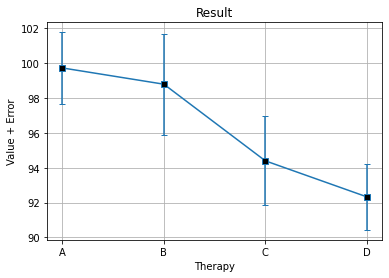

In [ ]:
# пример на python

url = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(url)

A = data[data["Therapy"] == "A"]["expr"]
A_avg = sum(A) / len(A)
B = data[data["Therapy"] == "B"]["expr"]
B_avg = sum(B) / len(B)
C = data[data["Therapy"] == "C"]["expr"]
C_avg = sum(C) / len(C)
D = data[data["Therapy"] == "D"]["expr"]
D_avg = sum(D) / len(D)

lst = ['A', 'B', 'C', 'D']
lst_avg = [A_avg, B_avg, C_avg, D_avg]
lst_err = [4.1 / 2, 5.8 / 2, 5.1 / 2, 3.8 / 2]

f_value, p_value = stats.f_oneway(A, B, C, D)
print(f'f-value: {round(f_value, 4)}, p-value: {round(p_value, 4)}')

plt.errorbar(x=lst, y=lst_avg, yerr=lst_err, marker='s', capsize=3, mfc='black')
plt.title('Result')
plt.xlabel('Therapy')
plt.ylabel('Value + Error')
plt.grid()
plt.show()

## Множественные сравнения в ANOVA

Когда мы делаем однофакторный ANOVA, мы можем просто узнать, есть ли вообще какие-то значимые отличие. Однако если мы хотим знать, *КАКИЕ ИМЕННО* группы отличаются, мы можем использовать **множественное сравнение**.

Если мы будем просто сравнивать все группы из одной ГС попарно по t-критерию Стьюдента, то вероятность того, что нам попадутся две группы с разными значениями, сильно возрастает. А*налогия: если просто один раз подбросить монетку, вероятность выпадения орла = 1/2. Однако если подбросить эту монетку 1000 раз, вероятность выпадения орла будет стремиться к 1.* Поэтому t-критерий Стьюдента использовать нельзя. Но нужно как-то подправить значения порога ($\alpha$), по которому мы сравниваем группы. 

Для этого есть **поправка Бонферрони:**

> Если мы хотим удержать p-уровень значимости, то при попарном сравнении групп нам надо заменить этот показатель на новый, который рассчитывается как показатель $p$, деленный на количество попарных сравнений:

> $p_1 =  \frac{p_0}{k}$, где $k = \frac{m(m - 1)}{2}, m$ - кол-во групп.

Далее ведем работу уже с этим показателем.

---

Однако при большом кол-во сравнений поправка Бонферрони становится слишком суровой. Поэтому иногда целесообразно использовать *критерий Тьюки*.

Вычисление **критерия Тьюки**:

> $q = \frac{\overline{x_B} - \overline{x_A}}{SE}$

> $SE = \sqrt{\frac{MS_w}{2}(\frac{1}{n_A} + \frac{1}{n_B})}$, где $MS_w$ - внутригрупповой средний квадрат

Если $n_A = n_B$:

> $SE = \sqrt{\frac{MS_w}{n}}$

Для расчета доверительного интервала используется *Studentized range distribution* со степенями свободы 2 и $n_A + n_B - 2$.

Например, 95% доверительный интервал:

$(\overline{x_B} - \overline{x_A}) \pm q_{0.05;2;n_A + n_B - 2}SE_{AB}$

Если интервал не включает в себя 0, значит можно отклонить $H_0$ о равенстве средних.

In [ ]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
MultiComp = MultiComparison(data['expr'], data['Therapy'])
print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


## Многофакторный ANOVA

[Видео с подробным объяснением расчета Two-way ANOVA](https://www.youtube.com/playlist?list=PLWtoq-EhUJe2TjJYfZUQtuq7a0dQCnOWp)

In [ ]:
#two way ANOVA

url = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(url)

expr_lm = ols('var4 ~ sex*hormone', data=data).fit()
table = sm.stats.anova_lm(expr_lm, type=2)
table

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,0.119762,0.119762,0.012228,0.912318
hormone,1.0,0.847472,0.847472,0.086528,0.769653
sex:hormone,1.0,89.483384,89.483384,9.136390,0.003682
Residual,60.0,587.650394,9.794173,NaN,NaN


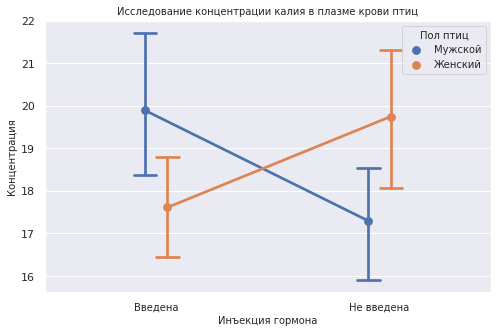

In [ ]:
# визуализация данных

sns.set(rc={'figure.figsize':(8, 5)})

pplot = sns.pointplot(x='hormone', y='var4', hue='sex', dodge=0.1,capsize=0.1,data=data)

plt.title('Исследование концентрации калия в плазме крови птиц', fontsize=10)
plt.xlabel('Инъекция гормона', fontsize=10)
plt.ylabel('Концентрация', fontsize=10)

bars = ('Введена', 'Не введена')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, fontsize=10)

leg_handles = pplot.get_legend_handles_labels()[0]
pplot.legend(leg_handles, ['Мужской', 'Женский'], title='Пол птиц', title_fontsize=10, fontsize=10)

Дисперсионный анализ можно применять только в том случае, когда соблюдены 2 условия:

* Нормальность распределения
* Гомогенность дисперсии (дисперсия должна быть примерно одинаковой в каждой из групп)

Однако при большом количестве наблюдений ANOVA устойчива к обоим нарушениям этих условий.

Но если число наблюдений небольшое, лучше провести тест Левена, который сравнивает дисперсии *(Levene's Test for Homogeneity of Variance)*.

# Корреляция и регрессия

## Понятие корреляции

**Корреляция (корреляционная зависимость)** — статистическая взаимосвязь двух или более случайных величин.

*Коэффициент корреляции* - показатель силы и направления взаимосвязи двух количественных переменных.

Пусть у нас есть множество значений, для каждого из которых есть какое-то значение $x$ и $y$.

Тогда расчитаем **ковариацию** - количественный показатель силы и направления взаимосвязи двух переменных:

> $cov_{xy} = \frac{\sum_{i=1}^{n}(x_{i}-\overline{x})\cdot(y_{i}-\overline{y})}{n - 1}$

*Чем больше ковариация, тем больше взаимосвязь, если ковариация положительная - положительная связь, и наоборот. Если равна 0 или очень близка к 0, значит взаимосвязи между переменными нет.*

Далее можно найти **коэффициент корреляции**:

> $r_{xy} = \frac{cov_{xy}}{\sigma_x\cdot\sigma_y}$

$r_{xy} \in [-1; 1]$

Тут все то же самое, что и с ковариацией.

Если расписать формулу коээфициента корреляции через ковариацию, расписать стандартное отклонение, из-под корня вынести $n-1$ и сократить, то можно получить еще одну **формулу коэффициента корреляции (Пирсона)**:

> $r_{xy} = \frac{\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\overline{x})^2 \sum_{i=1}^{n}(y_{i}-\overline{y})^2}}$

**Коэффициент детерминации** ($R^2$) - квадрат коэффициента корреляции, равен $r_{xy}^2$, показывает, в какой степени дисперсия одной переменной обусловлена "влиянием" другой.

$R^2 \in [0; 1]$

In [ ]:
# найти коэффициент корреляции

from scipy.stats.stats import pearsonr

x = [4, 5, 2, 3, 1]
y = [2, 1, 4, 3, 5]

pearsonr(x, y) # r and p-value

(-1.0, 0.0)

## Условия применения коэффициента корреляции

*Условия применения коэффициента корреляции Пирсона:*

* Характер взаимосвязи переменных должен быть линейным и монотонным.
* Обе переменные ($X$ и $Y$) должны иметь нормальное распределение. Выбросы довольно опасны.

Однако можно воспользовать непараметрическими аналогами, когда есть выбросы / распределение ненормально / нелинейно:
1. Коэффициент корреляции Спирмана
2. Коэффициент корреляции $\tau$ Кендалла

Формула коэффициента корреляции Спирмана:


> $r_s = 1 - \frac{6\sum_{i=1}^{n}d_i^2}{n(n^2-1)}$

[Вывод формулы тут](https://stats.stackexchange.com/questions/89121/prove-the-equivalence-of-the-following-two-formulas-for-spearman-correlation)

Суть метода заключается в том, что мы меняем значения $X$ и $Y$ на ранговые (сортируем каждый массив значений и ставим каждому значению номер по порядку), затем их каждого $Y$ вычитаем каждый $X$, получаю разницу рангов, то есть $d_i$. Далее просто по формуле считаем коэффициент.

---

*Ошибка корреляции*: положительная / отрицательная взаимосвязь между переменными не говорит о причинно-следственной зависимости между ними.

## Регрессия с одной независимой переменной

**Одномерный регрессионный анализ** - позволяет проверять гипотезы о взаимосвязи одной количественной зависимой переменной и нескольких независимых.

*Виды одномерного регрессионного анализа*:
* *Простая линейная регрессия* - исследуется взаимосвязь двух переменных.
* *Множественная регрессия* - несколько независимых переменных.

---

Говорим про **простую линейную регрессию**.

**Линейная регрессия (Linear regression)** — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

По оси $Y$ откладывается зависимая переменная, по оси $X$ - независимая.

**Линия регрессии:**

> $y = b_0 + b_1x$

$b_0$ - свободный член *(intercept)*, показывает, где прямая пересекает ось $Y$.

$b_1$ - *slope*, отвечает за направление и угол наклона.

Для того, чтобы построить регрессионную прямую, можно воспользоваться *методом наименьших квадратов*.

> **МНК (метод наименьших квадратов)** - метод нахождения оптимальных параметров линейной регресии ($b_0, b_1$), таких, чтоб сумма квадратов ошибок (остатков) была минимальной.

*Остаток точки* рассчитывается по формуле:

> $e_i = y_i - \hat{y_i}$, где $y_i$ - реальная координата точки, $\hat{y_i}$ - ее координата на регрессионной прямой.

Для оченки качества прямой используется сумма квадратов остатков: $\sum_{i=1}^{n}e^2_i$

МНК позволяет так подобрать эти коэффициенты, чтоб эта сумма была минимальной.

*Формулы расчета коэффициентов:*

> $b_1 = \frac{sd_y}{sd_x} \cdot r_{xy}$

> $b_0 = \overline{Y} - b_1 \cdot \overline{X}$

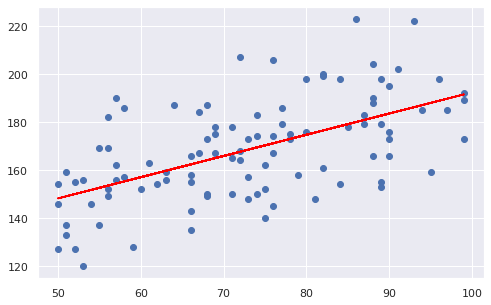

In [ ]:
# построение прямой линейной регрессии

n = 100
x = np.array([np.random.randint(50,100) for i in range(n)])
y = np.array([i + np.random.randint(80,120)-np.random.randint(-20,20) for i in x])

plt.scatter(x, y)

b1, b0 = np.polyfit(x, y, 1)
plt.plot(x, b0 + b1*x, color='red')
plt.show()

## Гипотеза о значимости взаимосвязи и коэффициент детерминации

**Гипотеза линейной регрессии:**

$H_0: b_1 = 0, y = b_0 = \overline{y}$

$H_1: b_1 \neq 0$

Чтобы проверить гипотезу о том, что $b_1$ отличный от нуля, используется *t-критерий*:

> $t = \frac{b_1 - 0}{se_{b_1}} = \frac{b_1}{se_{b_1}}$

> $df = n - 2$

> $se_{b1} = \frac{s}{\sum(x_i - \overline{x})^2}$

> $s = \sqrt{\frac{\sum(y_i - \overline{y})^2}{n - 2}}$ - оценка дисперсии остатков

95-% доверительный интервал для $b_1$:

> $b_1 \pm t_{.05}se_{b1}$

---

**Коэффициент детерминации ($R^2$)** - доля дисперсии зависимой переменной ($Y$), объясняемая регрессионной моделью.

> $R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \overline{y})^2} = 1 - \frac{\sum e_i^2}{\sum (y_i - \overline{y})^2}$

## Условия применения линейной регрессии с одним предиктором

*Условия применения:*
* Линейная взаимосвязь $X$ и $Y$
* Нормальное распределение остатков
* *Гомоскедастичность* - постоянная изменчивость остатков на всех уровнях независимой переменной

## Применение регрессионного анализа и интерпретация результатов

$b_1$ показывает, как (на сколько процентов) будет изменяться зависимая переменная при единичном изменении (на 1%) независимой.

In [ ]:
from scipy.stats import linregress

url = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'

data = pd.read_csv(url)
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


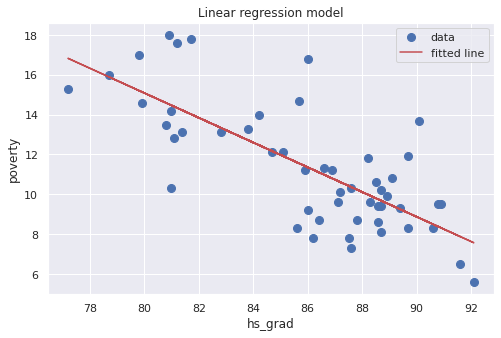

In [ ]:
slope, intercept, r_value, p_value, std_error = linregress(data['hs_grad'], data['poverty'])

plt.title('Linear regression model')
plt.xlabel('hs_grad')
plt.ylabel('poverty')
plt.plot(data['hs_grad'], data['poverty'], 'o', markersize='8', label='data')
plt.plot(data['hs_grad'], intercept + slope * data['hs_grad'], 'r', label='fitted line')

plt.legend()
plt.show()

## Задача предсказания значений зависимой переменной

С помощи линии тренда можно предсказать какое-либо значения зависимой переменной. Достаточно просто подставить ее в уравнение линии тренда.

## Регрессионный анализ с несколькими зависимыми переменными

Множественная регрессия позволяет исследовать *влияние сразу нескольких независимых переменных на одну зависимую переменную*.

При множественной регрессии формула примет вид:

> $\hat{y} = b_0 + b_1x_1 + ... + b_nx_n$

In [ ]:
import plotly.express as px

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

px.scatter_3d(data, x='white', y='hs_grad', z='poverty')

Text(0.5, 0, 'poverty')

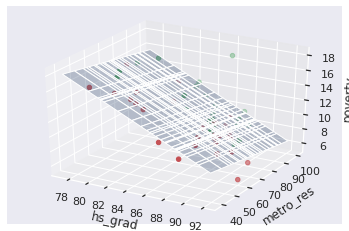

In [ ]:

from mpl_toolkits.mplot3d import axes3d
import statsmodels.formula.api as smf

%matplotlib inline

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

data.head()

lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

Всё остаётся примерно то же самое, только теперь не линия, а *плоскость* (это для 2х предикторов, 2х независимых переменных).

**Требования к данным для множественной регрессии**:
* Линейная зависимость переменных
* Нормальное распределение остатков
* Гомороскедастичность
* Проверка на мультиколлинеарность
* Нормальное распределение переменных (*желательно*)

При множественной регрессии:

> $interception \space (b_0)$ показывает, каким было бы значения зависимой переменной, если бы независимые переменные были равны 0.

> $slope \space (b_1)$ для независимой переменной показывает, на сколько изменилось бы значения зависимой переменной, если бы данная независимая переменная увеличилось бы на 1% *при условии, что все остальные перемменные не изменяются*.

**Исправленный R-квадрат (adjusted R-squared)** - скорректированный коэффициент детерминации. Рассчитывается при включении в модель дополнительных независимых переменных.

## Выбор наилучшей модели

**Мультиколлинеарность** - очень сильная взаимосвязь между какими-то из независимых переменных или их идентичность.

Поэтому если есть две очень сильно связанные переменные (у них большая корреляция), не стоит включать в модель их всех.

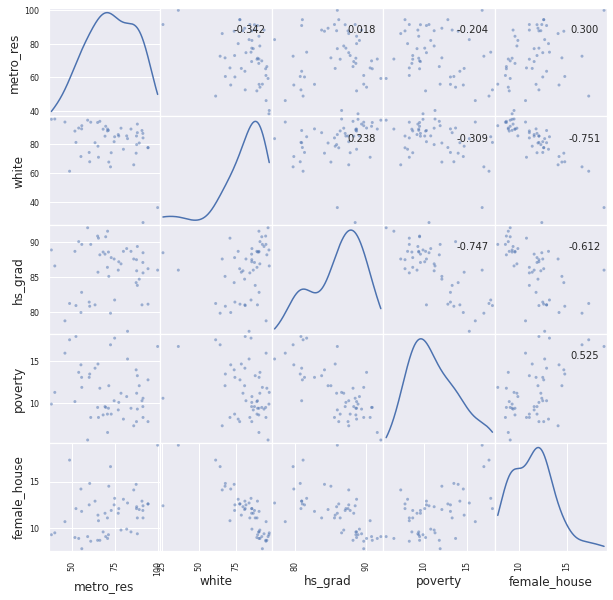

In [ ]:
data = pd.read_csv(
    'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

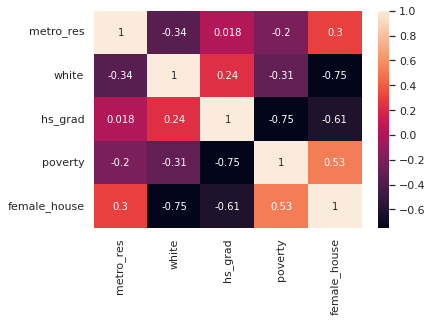

In [ ]:
hm = sns.heatmap(data.corr(),  cbar=True,  annot=True)

Из графиков выше мы видим, что переменная *female_house* очень сильно коррелирует со всеми остальными, поэтому включать в модель ее не стоит.

---

**Как выбрать итоговую модель?**

1. Из нашей модели убираем каждую переменную по отдельность, для каждой получившейся модели считаем $R^2_{adj}$.
2. Если наибольший $R^2_{adj}$ был у начальной модели (со всеми переменными), то она и есть самая лучшая модель. Если нет, берем модель с наибольшим $R^2_{adj}$ и повторяем с ней *п.1*.

## Классификация: логистическая регрессия и кластерный анализ

**Задача классификаации** — задача, в которой имеется множество объектов, разделённых, некоторым образом на классы. 

*Например*: у нас есть экономические показатели сотен стран и мы хотим как-то классифицировать эти страны, разделить на группы.

Для решения задач классификации есть 2 метода:
> 1) *Логистическая регрессия* - метод, который позволяет исследовать взаимосвязи между зависимой переменной, которая имеет 2 градации (номинативная переменная) и различными предиктами (независимыми переменными).

> 2) *Кластерный анализ*. Для каждого наблюдения находит наблдения, который похожи на него, и наблюдения, которые сильно от него отличаются. Подробнее: [Хабр](https://habr.com/ru/post/101338/)

## GLM и продвинутые темы


Ссылка на вебинар на Ютубе: [тык](https://www.youtube.com/watch?v=1-ADJNE1WNc)

**GLM (Generalized Linear Models)** - обобщенные линейные модели.

*Общая (упрощенная) формула:*

> $f(y) = b_0 + b_1x_1 + ... + b_nx_n + ϵ$, где $\epsilon$ - ошибка (остатки уравнения)

$f(y)$ - **функция связи**. Она преобразовывает распределение зависимой переменной так, что:

1. Она принимает значения от $-\infty$ до $+\infty$
2. Связь зависимой переменной с предикторами линейна.

*Примеры функции связи:*

* *Identity* - без преобразования ("функция связи" обычной линейной регрессии)

* *Логарифмирование*

* *Обратная функция*

*  *Квадратный корень*

*Виды GLM:*

**1) Биномиальная регрессия (логистическая регрессия)**

Используется *распределение Бернулли*.

Параметры:

* $p$ - вероятность успеха
* $n$ - кол-во попыток (=1)

Типичная функция связи: *логит*

Как считать логит:

1. $q$ - вероятность успеха, $ \in [0; 1]$
2. $\frac{q}{1 - q}$ - шансы успеха, $ \in [0; \infty]$
3.  $\ln{\frac{q}{1 - q}}$ - логит, $ \in [-\infty; \infty]$

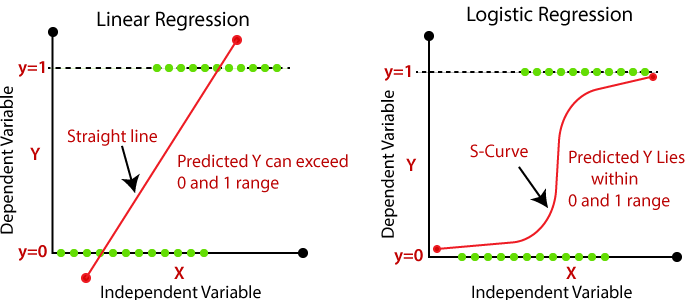

In [2]:
uploaded = files.upload()

Saving titanik_full_data (1).csv to titanik_full_data (1).csv


In [4]:
titanic = pd.read_csv('titanik_full_data (1).csv', sep='\t')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Судьба пассажиров Титаника')

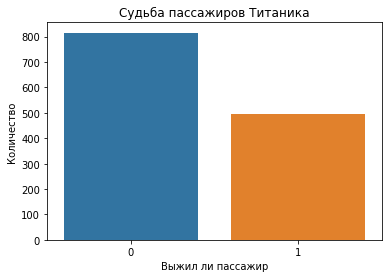

In [5]:
sns.countplot(x='Survived',data=titanic)
plt.xlabel('Выжил ли пассажир')
plt.ylabel('Количество')
plt.title('Судьба пассажиров Титаника')

In [6]:
logit_res = sf.glm(formula='Survived ~ C(Pclass) + C(Sex) + Age', data=titanic, family=sm.families.Binomial()).fit()

In [ ]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Sat, 09 Jul 2022   Deviance:                       796.42
Time:                        10:20:43   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

**2) Пробит-регрессия**

Переводит вероятности в нормальное распределение ($\mu = 0, \space\sigma = 1$)

Используется обратная функция кумулятивного стандартного нормального распределения (превращает вероятности в z-значения).

**3) Мультиномиальная регрессия** - используется, когда номинативная переменная может принимать 3 или более значения *(какой напиток он купил? Колу / Фанту / Спрайт...)*

Используется *мультиномиальное распределение*.

Параметры:

* $p1 ... p_n$ - вероятность каждого события
* $n$ - кол-во попыток

Типичная функция связи: *мультиномиальный логит*

*Пример:* триномиальное распределение


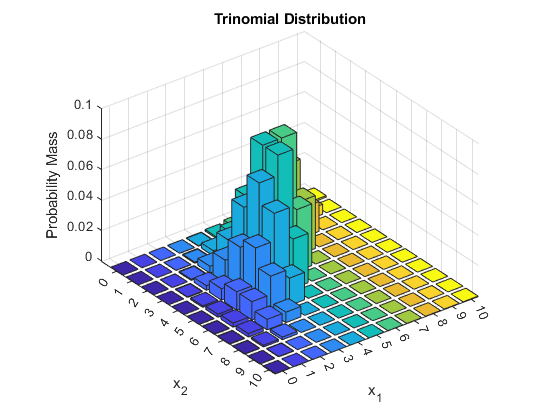

Text(0.5, 1.0, 'Пассажирские классы')

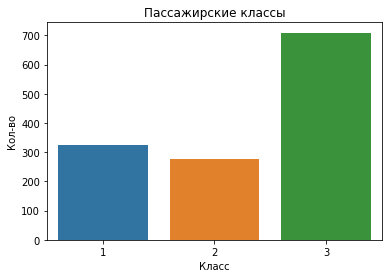

In [7]:
sns.countplot(x='Pclass', data=titanic)
plt.xlabel('Класс')
plt.ylabel('Кол-во')
plt.title('Пассажирские классы')

In [8]:
multi_res = sf.mnlogit('Pclass ~ C(Sex) + Age', titanic).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.1028
Time:                        15:50:59   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

1й класс - *референтный*, результаты интерпретируются относительно него.

---

Порядковые данные - например, оценка фильма от 1 до 5.

* Порядковые данные очень тяжело анализировать, поэтому если есть возможность, то лучше их избегать.

* Если гипотезы простые, можно пользоваться ранговыми переменными.

* Иначе остается только GLM.

Нам нужно оценить, какой шанс того, что мы перейдем от более низкой категории к более высокой, что мы пересечем очередной порог (пунктир на картинке).

**4) Порядковая регрессия**

Используется *кумулятивное пороговое распределение*.

Параметры:

* $p1 ... p_n$ - вероятность каждой категории

Типичная функция связи: *порядковый логит*


In [9]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [10]:
wines = pd.read_csv('winequality-red.csv', sep=';')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Рейтинг красных вин')

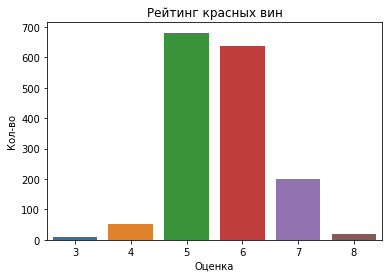

In [11]:
sns.countplot(x='quality', data=wines)
plt.xlabel('Оценка')
plt.ylabel('Кол-во')
plt.title('Рейтинг красных вин')

In [16]:
!pip install git+https://github.com/Shopify/bevel.git
!pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Shopify/bevel.git to /tmp/pip-req-build-5x5fy7u6
  Running command git clone -q https://github.com/Shopify/bevel.git /tmp/pip-req-build-5x5fy7u6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.8 MB/s 
     |████████████████████████████████| 189 kB 29.7 MB/s 
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=e3884e1b3d89aa0231cd6fceeb189d39e359d13d721102aaaf8504c4e851cb7e
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built algopy


In [17]:
from bevel.linear_ordinal_regression import OrderedLogit

Y = wines.quality
X = wines.drop('quality', axis=1)

ol = OrderedLogit()
ol.fit(X, Y)

In [18]:
ol.print_summary()

n=1599
                         beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                            
fixed acidity          0.1284    0.0823 0.1188     -0.0329      0.2898     
volatile acidity      -3.3957    0.4031 0.0000     -4.1857     -2.6058  ***
citric acid           -0.8022    0.4622 0.0827     -1.7081      0.1038    .
residual sugar         0.0878    0.0480 0.0670     -0.0062      0.1818    .
chlorides             -5.1416    1.3595 0.0002     -7.8062     -2.4770  ***
free sulfur dioxide    0.0137    0.0068 0.0444      0.0003      0.0270    *
total sulfur dioxide  -0.0111    0.0024 0.0000     -0.0158     -0.0065  ***
density              -76.5142   68.3658 0.2631   -210.5087     57.4802     
pH                    -0.8469    0.6009 0.1587     -2.0246      0.3309     
sulphates              2.9016    0.3675 0.0000      2.1814      3.6218  ***
alcohol                0.8308    0.0852 0.0000      0.6637      0.9978  ***
---
S

**5) Регрессия Пуассона**

Обычно нужно при анализе данных количества *(сколько бутылок воды я купил? 1, 2, 10 ...)*.

Используется *пуассоновское распределение*.

Параметры:

* $\lambda$ - темп (rate)

Типичная функция связи: *логарифм*

**Темп** заменяет собой одновременно и среднее, и дисперсию. Чем больше среднее, тем больше дисперсия, и наоборот. Однако в реальности так может быть не всегда:

* Если дисперсия в реальности меньше среднего - **недодисперсия**.
* Если дисперсия в реальности *больше* среднего - **сверхдисперсия**, *очень частый случай*.

В этих случаях наша модель не будет адекватной.

Чтобы избежать таких проблем, соеденили между собой *пуассоновское распределение* и *гамма-распределение* и получили *отрицательноо биномиальное распределение*.

**6) Отрицательно-биномиальная регрессия**

Используется *отрицатнельно-биномиальное распределение*.

Параметры:

* $\mu$ - среднее
* $\theta/\alpha$ - форма / дисперсия

Типичная функция связи: *логарифм*

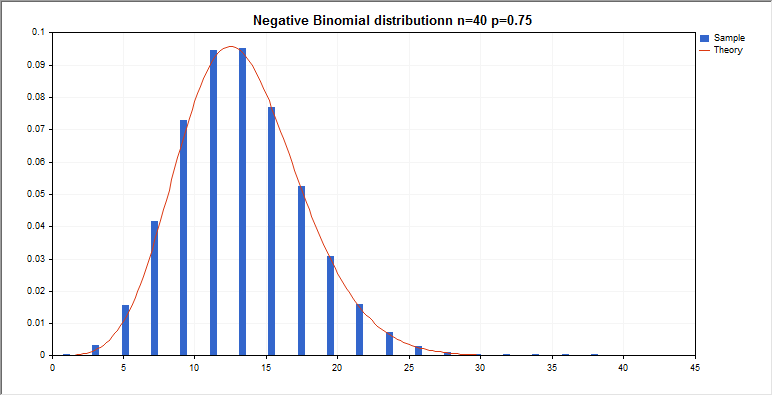

Из-за того, что в таком распределении появляется много нулей *(например, люди, которые вообще не купили воду)*, пользуются еще одним распределением.

**7) Zero-inflated regression**

Используется *отрицательно-биномиальное | пуассоновское распределение с повышенным кол-вом нулей*.

Параметры:

* $\mu$ - среднее
* $\theta/\alpha$ - форма / дисперсия

или

* $\lambda$ - темп (rate)

+

* $\pi$ - вероятность принадлежности к процессу

Типичная функция связи: *логарифм*

In [19]:
uploaded = files.upload()

Saving credit_card.csv to credit_card.csv


In [20]:
credit = pd.read_csv('credit_card.csv')

In [21]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Text(0.5, 1.0, 'Кол-во активных счетов')

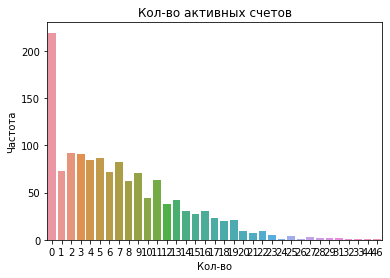

In [22]:
sns.countplot(x='active', data=credit)
plt.xlabel('Кол-во')
plt.ylabel('Частота')
plt.title('Кол-во активных счетов')

In [23]:
# модель Пуассона

pois = sf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', \
              family = sm.families.Poisson(), data=credit).fit()
pois.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5614.4
Date:                Sat, 09 Jul 2022   Deviance:                       7142.4
Time:                        15:54:31   Pearson chi2:                 6.89e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4000      0.037     37.440      0.000       1.327       1.473
C(owner)[T.yes]       0.4033      0.023     17.409      0.000       0.358       0.449
C(selfemp)[T.yes]     0.0141      0.040      0.355      0.723      -0.064       0.092
age                   0.0062      0.001      5.648      0.000       0.004       0.008
income                0.0361      0.006      5.752      0.000       0.024       0.048
expenditure        2.925e-05   3.75e-05      0.779      0.436   -4.43e-05       0.000
=====================================================================================
"""

Посчитаем сверхдисперсию для этого распределения:

In [24]:
pois.pearson_chi2 / pois.df_resid

5.249939996924408

Для модели Пуассона это число должно быть близко к 1, а тут оно больше в 5 раз.

In [25]:
# отрицательно-биномиальная модель

neg = sf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', \
              family = sm.families.NegativeBinomial(alpha=0.15), data=credit).fit()
# alpha - параметр дисперсии, рекомендуется ставить от 0.1 до 2

neg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4429.3
Date:                Sat, 09 Jul 2022   Deviance:                       3940.9
Time:                        15:54:37   Pearson chi2:                 3.44e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3690      0.054     25.206      0.000       1.263       1.475
C(owner)[T.yes]       0.3984      0.033     11.996      0.000       0.333       0.463
C(selfemp)[T.yes]     0.0055      0.059      0.094      0.925      -0.110       0.121
age                   0.0069      0.002      4.263      0.000       0.004       0.010
income                0.0393      0.010      4.099      0.000       0.021       0.058
expenditure        2.445e-05   5.63e-05      0.434      0.664   -8.59e-05       0.000
=====================================================================================
"""

Со сверхдисперсией ситуация уже немного лучше:

In [26]:
neg.pearson_chi2 / neg.df_resid

2.61967807248698

Еще чтобы сравнить модели, лучше использовать **информационный критерий Акаике (AIC)**. Чем он ниже, тем лучше модель.

In [27]:
print(pois.aic)
print(neg.aic)

11240.817775454601
8870.632884339046


Придиктивная способность отрицательно-биномиальной модели лучше.

In [28]:
# zero-inflated poisson model

credit.owner = np.where(credit.owner == 'yes', 1, 0)
credit.selfemp = np.where(credit.selfemp == 'yes', 1, 0) #меняем данные на 0 и 1, чтобы не было ошибки

Y = credit.active #ЗП
X = credit.loc[:, ['owner', 'selfemp', 'age', 'income', 'expenditure']] #НП
X = sm.add_constant(X) # добавляем константу, чтобы в модели был intercept

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
zeroinf = sm.ZeroInflatedPoisson(Y, X).fit(maxiter = 100, method = 'ncg')
zeroinf.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 3.899929
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 9
         Hessian evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                  active   No. Observations:                 1319
Model:             ZeroInflatedPoisson   Df Residuals:                     1313
Method:                            MLE   Df Model:                            5
Date:                 Sat, 09 Jul 2022   Pseudo R-squ.:                -0.05893
Time:                         15:54:50   Log-Likelihood:                -5144.0
converged:                        True   LL-Null:                       -4857.8
Covariance Type:             nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.0999      0.055      1.812      0.070      -0.008       0.208
const             1.7967      0.037     48.172      0.000       1.724       1.870
owner             0.0017      0.023      0.073      0.942      -0.043       0.046
selfemp           0.0008      0.039      0.022      0.983      -0.075       0.077
age               0.0093      0.001      8.656      0.000       0.007       0.011
income            0.0019      0.007      0.280      0.779      -0.011       0.015
expenditure       0.0001   3.81e-05      2.691      0.007    2.79e-05       0.000
=================================================================================
"""

Тут уже значимыми стали только возраст и расходы.

In [30]:
print(pois.aic)
print(neg.aic)
print(zeroinf.aic)

11240.817775454601
8870.632884339046
10300.01303290444


In [31]:
# zero-inflated negative binomial

zeroinf_2 = sm.ZeroInflatedNegativeBinomialP(Y, X).fit(maxiter = 100, method = 'ncg')
zeroinf_2.summary()

Optimization terminated successfully.
         Current function value: 3.055913
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 13
         Hessian evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                            active   No. Observations:                 1319
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1313
Method:                                      MLE   Df Model:                            5
Date:                           Sat, 09 Jul 2022   Pseudo R-squ.:                -0.03018
Time:                                   15:54:56   Log-Likelihood:                -4030.7
converged:                                  True   LL-Null:                       -3912.7
Covariance Type:                       nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.5152      0.058     -8.820      0.000      -0.630      -0.401
const             1.4543      0.087     16.765      0.000       1.284       1.624
owner             0.3590      0.050      7.112      0.000       0.260       0.458
selfemp           0.0029      0.090      0.032      0.974      -0.173       0.178
age               0.0097      0.003      3.757      0.000       0.005       0.015
income            0.0352      0.016      2.234      0.026       0.004       0.066
expenditure    5.109e-05   9.08e-05      0.563      0.573      -0.000       0.000
alpha             0.4517      0.032     14.330      0.000       0.390       0.514
=================================================================================
"""

In [32]:
print(pois.aic)
print(neg.aic)
print(zeroinf.aic)
print(zeroinf_2.aic)

11240.817775454601
8870.632884339046
10300.01303290444
8073.499747325221




---

Допустим, у нас из компании у нас уходят клиенты. Тут нам важно не только *событие* (клиент ушел), но и *время* (как скоро клиент ушел). Тогда используется другая регрессия.

**8) Регрессия выживаемости (Survival)**, *модель ускорения времени неудачи*

Ту часть данных, для которой событие не произошло, называют *цензурированной*. Она тоже влияет на показатели итоговой модели.

Используется *Вейбулловское распределение (как вариант)*.

Параметры:

* $\gamma$ - форма
* $\alpha$ - дисперсия

Типичная функция связи: *логарифм*



In [34]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 4.3 MB/s 
     |████████████████████████████████| 68 kB 7.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=961294fb4adb8415625a5f8d34875f9ed8ae1bfef0df9fb5f4c072e98c026ba8
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.

In [36]:
import lifelines as lf

In [37]:
churn = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

In [38]:
churn = churn.loc[:, ['Churn', 'tenure', 'SeniorCitizen', 'Dependents', 'MonthlyCharges', 'PaperlessBilling']]
churn.head()

,Churn,tenure,SeniorCitizen,Dependents,MonthlyCharges,PaperlessBilling
0,No,1,0,No,29.85,Yes
1,No,34,0,No,56.95,No
2,Yes,2,0,No,53.85,Yes
3,No,45,0,No,42.30,No
4,Yes,2,0,No,70.70,Yes


Text(0.5, 1.0, 'Судьба клиентов компании')

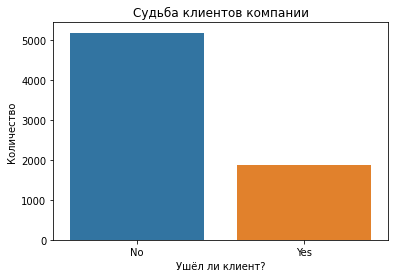

In [39]:
sns.countplot(x='Churn', data=churn)
plt.xlabel('Ушёл ли клиент?')
plt.ylabel('Количество')
plt.title('Судьба клиентов компании')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Сколько времени клиенты провели с компанией')

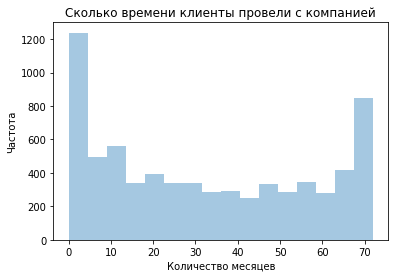

In [40]:
sns.distplot(churn.tenure, kde=False)
plt.xlabel('Количество месяцев')
plt.ylabel('Частота')
plt.title('Сколько времени клиенты провели с компанией')

In [41]:
churn.tenure = churn.tenure + 0.001 # чтобы не было нулевых месяцев, так как логарифм от нуля брать нельзя
churn.Churn = np.where(churn.Churn == 'Yes', 1, 0) # перекодируем в числа
churn.SeniorCitizen = np.where(churn.SeniorCitizen == 1, 'Yes', 'No') # наоборот

In [42]:
surv = lf.WeibullAFTFitter()

surv.fit(df = churn, duration_col = 'tenure', event_col = 'Churn', \
         formula = 'C(SeniorCitizen) + C(Dependents) + MonthlyCharges + C(PaperlessBilling)')

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [43]:
surv.print_summary()

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -10355.96
         time fit was run = 2022-07-09 15:56:01 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                          
lambda_ Intercept                    5.84     344.19       0.12             5.61             6.08               272.31               435.03
        C(Dependents)[T.Yes]         1.21       3.34       0.10             1.02             1.40                 2.76                 4.05
        C(PaperlessBilling)[T.Yes]  -0.91       0.40       0.09            -1.08            -0.74                 0.34                 0.48
        C(SeniorCitizen)[T.Yes]     -0.38       0.69       0.09            -0.54            -0.21                 0.58                 0.81
        MonthlyCharges              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
rho_    Intercept                   -0.43       0.65       0.02            -0.47            -0.39                 0.63                 0.68

                                     cmp to      z      p   -log2(p)
param   covariate                                                   
lambda_ Intercept                      0.00  48.88 <0.005        inf
        C(Dependents)[T.Yes]           0.00  12.38 <0.005     114.48
        C(PaperlessBilling)[T.Yes]     0.00 -10.31 <0.005      80.37
        C(SeniorCitizen)[T.Yes]        0.00  -4.44 <0.005      16.75
        MonthlyCharges                 0.00  -0.85   0.39       1.35
rho_    Intercept                      0.00 -20.70 <0.005     313.93
---
Concordance = 0.62
AIC = 20723.91
log-likelihood ratio test = 441.19 on 4 df
-log2(p) of ll-ratio test = 310.46

**Итог:**

* Переменная из двух категорий – биномиальная регрессия
* Категорий больше – мультиномиальная
* В категориях есть явное убывание или нарастание – порядковая
* Считаем количество чего-то – Пуассоновская, дисперсия больше среднего – отрицательно-биномиальная, слишком много нулей – zero-inflated модель
* У нас есть какое-то событие и время до него – анализ выживаемости

# Полезные ссылки:


*   [Distribution Calculator (Расчет p-уровня значимости)](https://gallery.shinyapps.io/dist_calc/)
*   [Таблица критических значений для t-распределения](https://www.medcalc.org/manual/t-distribution-table.php)
*   [Таблица критических значений для Studentized распределения](https:www.stat.purdue.edu/~lingsong/teaching/2018fall/q-table.pdf)
*   [Визуализация корреляции](http://rpsychologist.com/d3/correlation/)
*   [Игра "Угадай Корреляцию"](http://guessthecorrelation.com/)



# Дополнительно

*Интересные материалы по статистике (советы их комментариев)*:

1) Дарелл Хафф  "Как лгать при помощи статистики", 1954. /Классика жанра о том, что на каждого мудреца довольно простоты/

2) Чарльз Уилан "Голая статистика. Самая интересная книга о самой скучной науке" /Не очень удачная попытка ремейка предыдущей книги/

3) С. Гланц "Медико-биологическая статистика" /Отчаянно рекомендуется на просторах рунета для прочтения начинающим в качестве самообучения. Имея техническое образование, ответственно заявляю, что таковой книга не является, поэтому и сижу на этом курсе/

4) курс НОУ ИНТУИТ "Теория вероятностей и математическая статистика"/Есть на youtube. Прикольный дядечка-препод, рекомендую глянуть на стиль подачи материала /

5) Скотт О. Лилиенфельд "50 великих мифов популярной психологии" /Знаменитая книга о том, как научный метод и статистика разрушает легенды житейской психологии. Читать с осторожностью, во избежание эксцессов.../